In [12]:
import numpy as np
import pandas as pd

In [13]:
# from google.colab import files

# uploaded = files.upload()


# for filename in uploaded.keys():
#     print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\Retinopathy-Dataset.csv")
data.head()

,"age,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,has_retinopathy"
0,"77.19633950880227,85.28874241861108,80.0218775..."
1,"63.529850223417135,99.379735822842,84.85236069..."
2,"69.00398622029647,111.34945500281164,109.85061..."
3,"82.63820981358452,95.05612754603376,79.6668508..."
4,"78.34628567225764,109.1545908233547,90.7132200..."


In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 1 columns):
 #   Column                                                                            Non-Null Count  Dtype 
---  ------                                                                            --------------  ----- 
 0   age,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,has_retinopathy  6000 non-null   object
dtypes: object(1)
memory usage: 47.0+ KB


In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.show()


ValueError: could not convert string to float: '77.19633950880227,85.28874241861108,80.02187758411247,79.95710875331814,1.0'

<Figure size 1000x800 with 0 Axes>

In [18]:
feature = data.drop(['has_retinopathy'], axis =1)
target = data['has_retinopathy']
feature.head()

KeyError: "['has_retinopathy'] not found in axis"

In [ ]:
target.head()


,has_retinopathy
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import LinearSVC
modelSVC = LinearSVC(random_state=42, dual=False)
modelSVC.fit(X_train_scaled, y_train)

LinearSVC(dual=False, random_state=42)

In [ ]:
y_pred_SVC = modelSVC.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_SVC)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_SVC))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_SVC))

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74       575
         1.0       0.76      0.75      0.75       625

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200


Confusion Matrix:
[[429 146]
 [159 466]]


**CNN for binary classification (Retinopathy / No Retinopathy)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\Admin\OneDrive\Documents\ML\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
 #print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

ModuleNotFoundError: No module named 'numpy'

In [ ]:
X_dummy = np.random.rand(1000, 128, 128, 3)
y_dummy = np.random.randint(0, 2, 1000)


In [ ]:
history = model.fit(X_dummy, y_dummy, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 758ms/step - accuracy: 0.5079 - loss: 1.2871 - val_accuracy: 0.5200 - val_loss: 0.6931
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 863ms/step - accuracy: 0.5276 - loss: 0.6934 - val_accuracy: 0.5350 - val_loss: 0.6928
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 752ms/step - accuracy: 0.5682 - loss: 0.6907 - val_accuracy: 0.4800 - val_loss: 0.6937
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 863ms/step - accuracy: 0.5165 - loss: 0.6919 - val_accuracy: 0.4800 - val_loss: 0.6936
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 744ms/step - accuracy: 0.5132 - loss: 0.6930 - val_accuracy: 0.4800 - val_loss: 0.7000


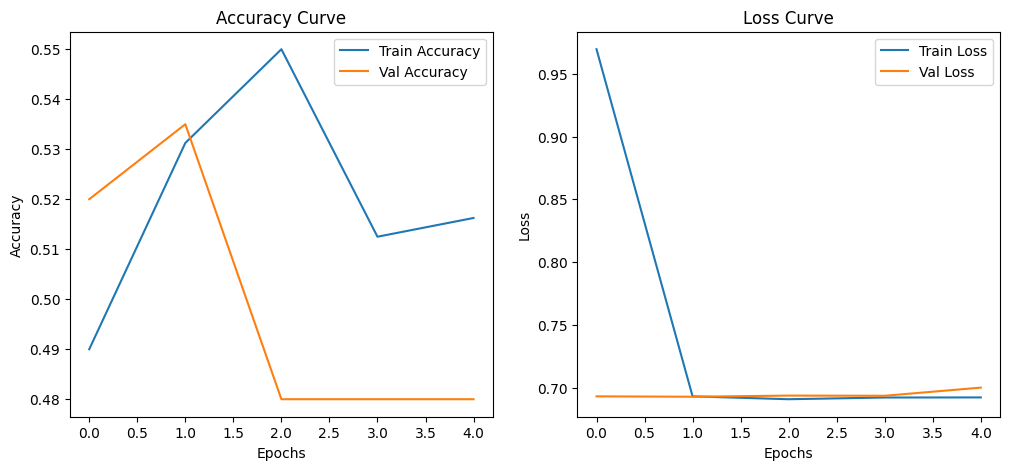

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.show()

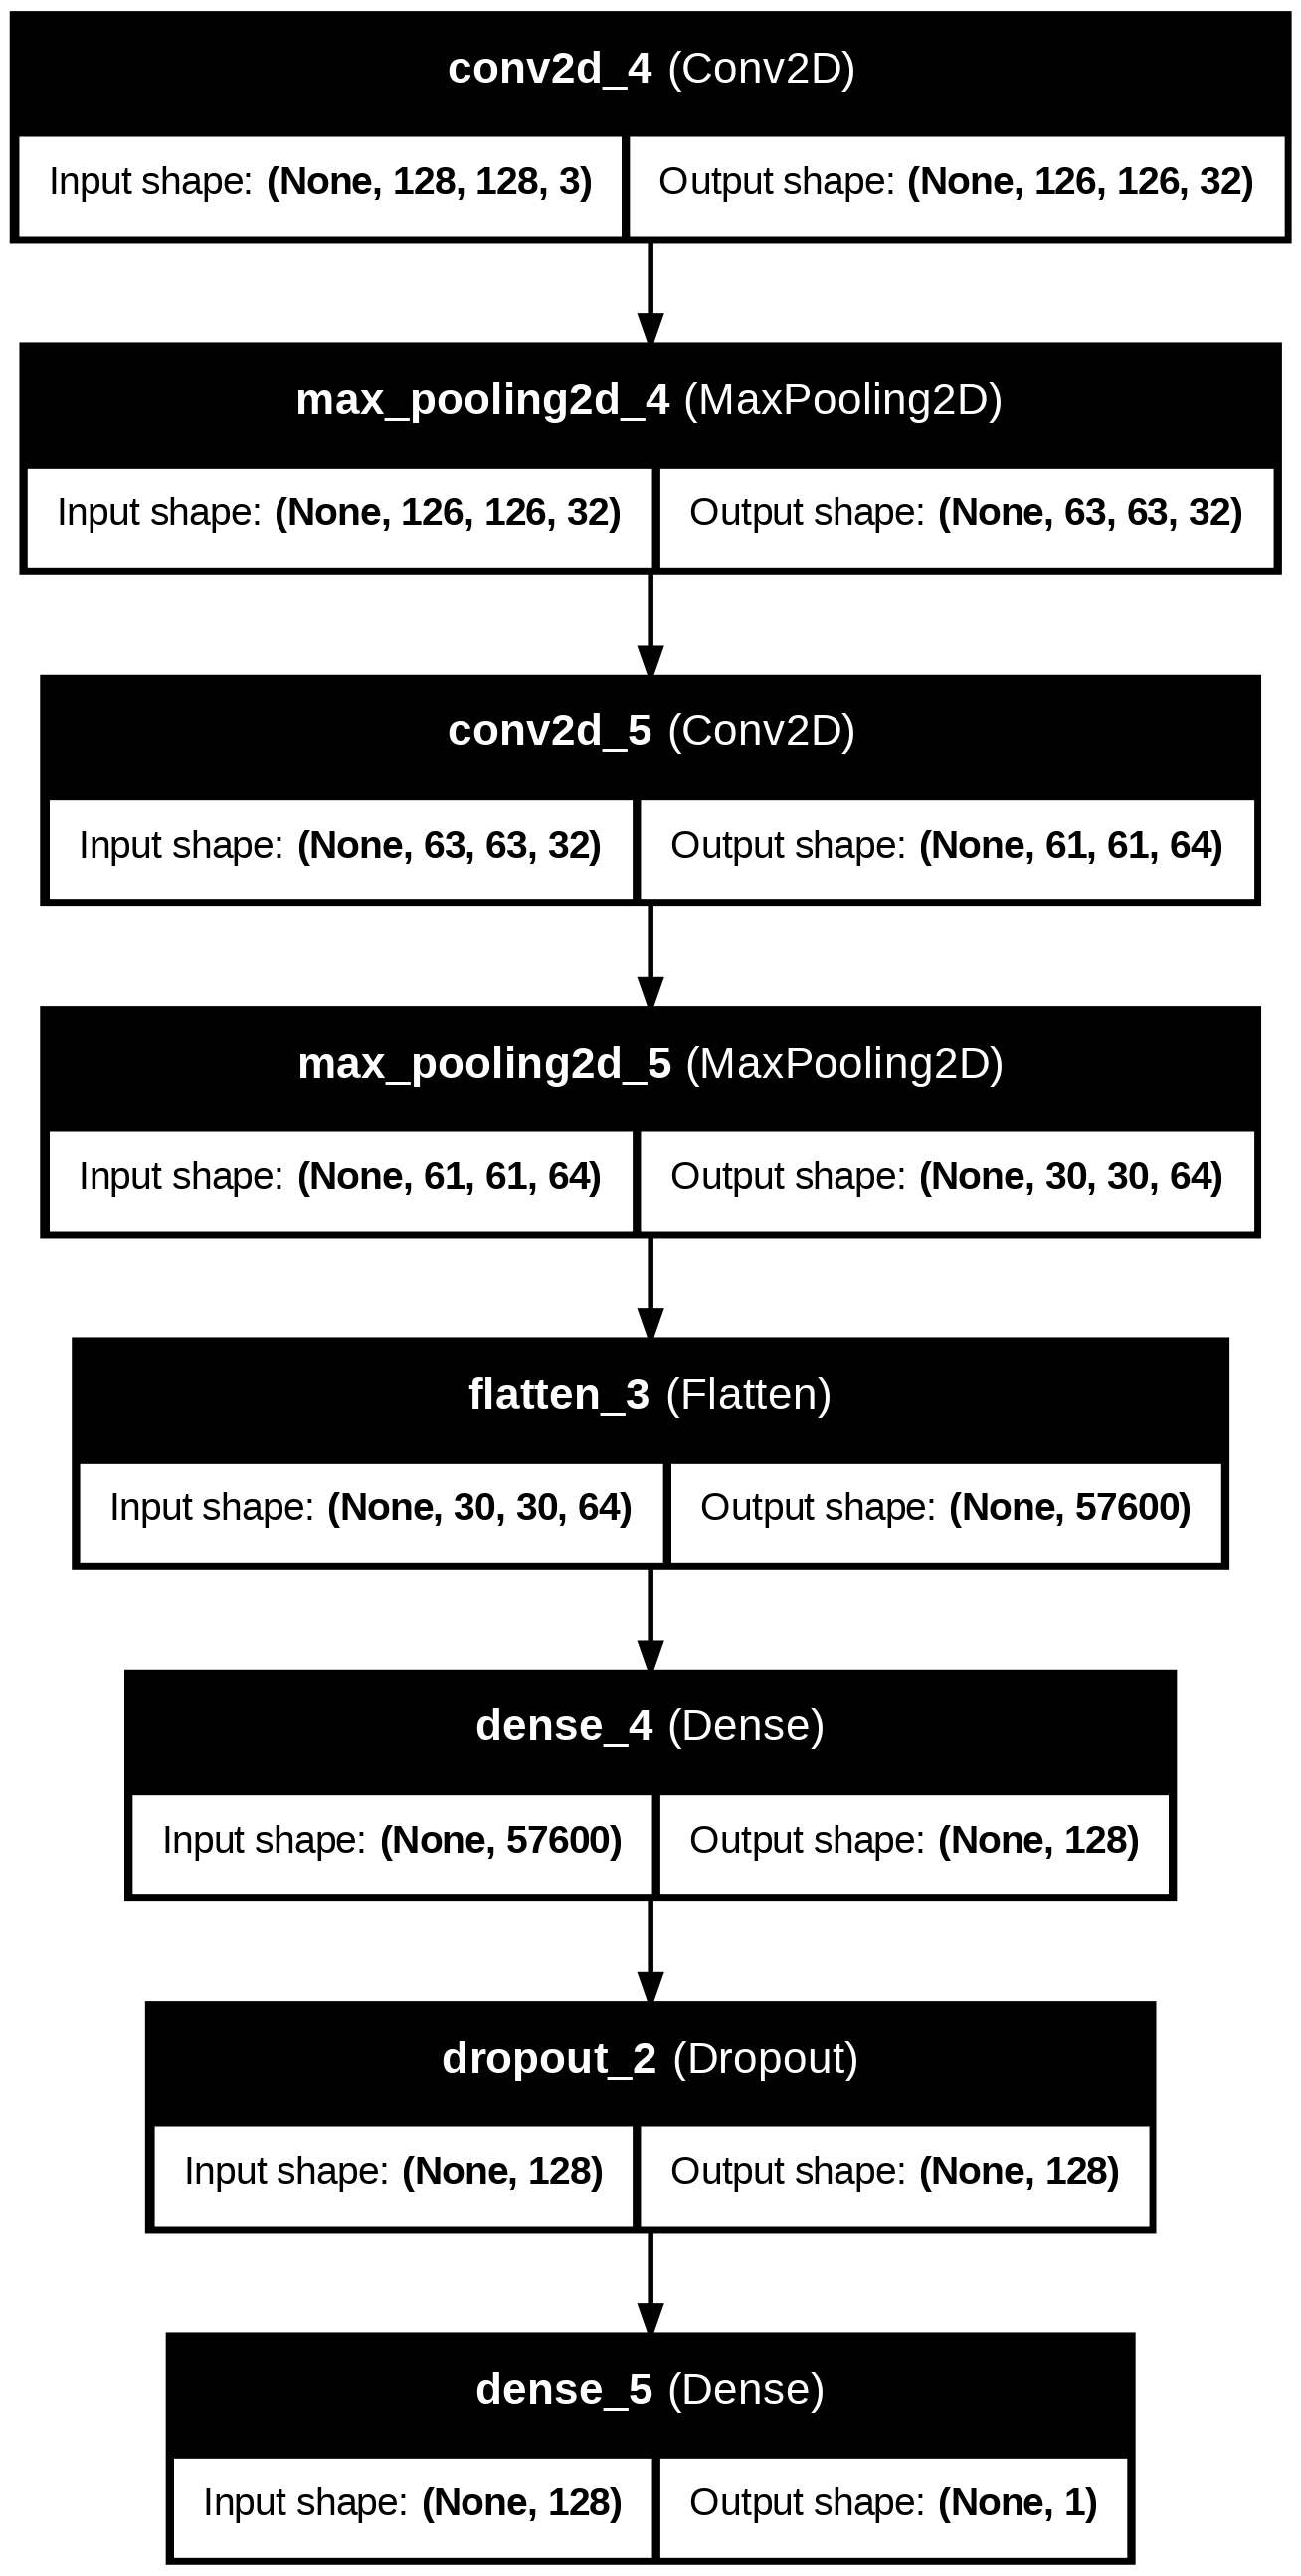

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file="cnn_model.png")

from IPython.display import Image
Image("cnn_model.png")

**Predict on test/validation set**

In [ ]:
y_true = y_dummy[:200]
y_pred_probs = model.predict(X_dummy[:200])
y_pred = (y_pred_probs > 0.5).astype("int32")


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


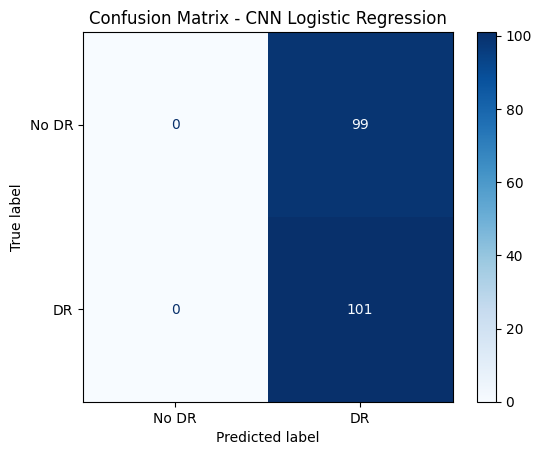

Classification Report:
              precision    recall  f1-score   support

       No DR       0.00      0.00      0.00        99
          DR       0.51      1.00      0.67       101

    accuracy                           0.51       200
   macro avg       0.25      0.50      0.34       200
weighted avg       0.26      0.51      0.34       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No DR", "DR"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - CNN Logistic Regression")
plt.show()

# -------------------------
# Step 3: Precision, Recall, F1-score
# -------------------------
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["No DR", "DR"]))

**CNN with Precision & Recall per Epoch**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

**CNN Model with extra metrics**

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**precision & recall as metrics**

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name="precision"),
                       tf.keras.metrics.Recall(name="recall")])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

**Train model**

**Generate Dummy Data (replace with your real data)**

In [ ]:
history = model.fit(X_dummy, y_dummy,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 805ms/step - accuracy: 0.4863 - loss: 2.1371 - precision: 0.4967 - recall: 0.5732 - val_accuracy: 0.4500 - val_loss: 0.6933 - val_precision: 0.4500 - val_recall: 1.0000
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 860ms/step - accuracy: 0.5172 - loss: 0.6931 - precision: 0.5172 - recall: 1.0000 - val_accuracy: 0.4500 - val_loss: 0.6935 - val_precision: 0.4500 - val_recall: 1.0000
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 748ms/step - accuracy: 0.5057 - loss: 0.6932 - precision: 0.5057 - recall: 1.0000 - val_accuracy: 0.4500 - val_loss: 0.6935 - val_precision: 0.4500 - val_recall: 1.0000
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 801ms/step - accuracy: 0.5232 - loss: 0.6928 - precision: 0.5232 - recall: 1.0000 - val_accuracy: 0.4500 - val_loss: 0.6938 - val_precision: 0.4500 - val_recall: 1.0000
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 772ms/step - accuracy: 0.5174 - loss: 0.6930 - precision: 0.5174 - recall: 1.0000 - val_accuracy: 0.4500 - val_loss: 0.

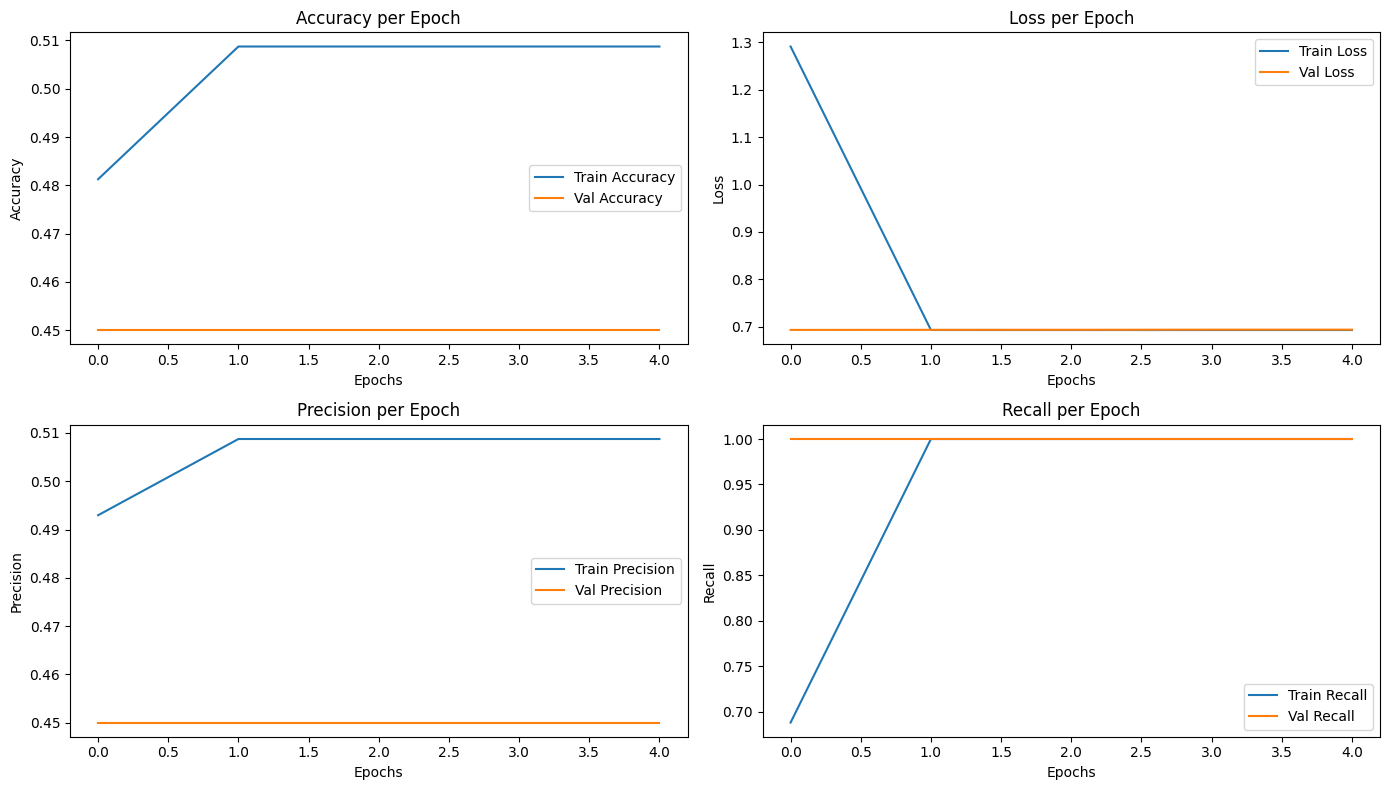

In [ ]:
plt.figure(figsize=(14,8))

# Accuracy
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(2,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Precision
plt.subplot(2,2,3)
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Val Precision')
plt.title("Precision per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.legend()

# Recall
plt.subplot(2,2,4)
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Val Recall')
plt.title("Recall per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_true = y_dummy[:200]
y_pred_probs = model.predict(X_dummy[:200]).ravel()

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step


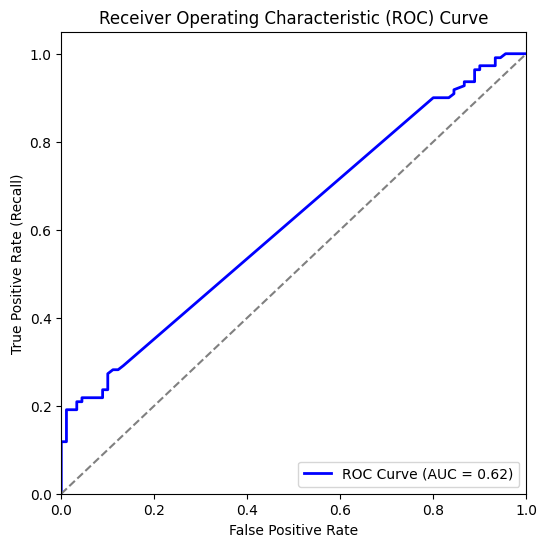

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

***ResNet50 Model***


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/MyDrive/colored images"


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 8

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)


Found 4 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load pre-trained ResNet50
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(img_size,img_size,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Compile
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 2

datagen = ImageDataGenerator(rescale=1./255)  # no validation split

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical"
)

# Train without validation
history = model.fit(
    train_generator,
    epochs=5
)



Found 4 images belonging to 2 classes.
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step - accuracy: 0.8333 - loss: 0.6874
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step - accuracy: 0.8333 - loss: 0.6586
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.6667 - loss: 0.7319
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 0.6667 - loss: 0.6449
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.5000 - loss: 0.6775


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def predict_image(img_path):
    img = load_img(img_path, target_size=(img_size,img_size))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    classes = list(train_generator.class_indices.keys())
    return classes[class_index], prediction

print(predict_image(dataset_path + "/DR/DR1.png"))
print(predict_image(dataset_path + "/NPDR/NPDR1.jpg"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
('DR', array([[0.74493945, 0.2550606 ]], dtype=float32))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
('DR', array([[0.64450175, 0.35549828]], dtype=float32))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 4  # smaller batch size since dataset is tiny

# Augmentation: rotate, zoom, flip, shift, etc.
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical"
)


Found 4 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,  # more epochs to see effect of augmentation
    steps_per_epoch=20  # artificially expand dataset (20*batch_size samples per epoch)
)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.5000 - loss: 0.8462 
Epoch 2/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.5000 - loss: 0.8163
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - accuracy: 0.5000 - loss: 0.6619 
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.2500 - loss: 0.7132 
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.5000 - loss: 0.6942 
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.5000 - loss: 0.7100 
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - accuracy: 0.5000 - loss: 0.6911
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5000 - loss: 0.7661
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7500 - loss: 0.5853
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7500 - loss: 0.6155   


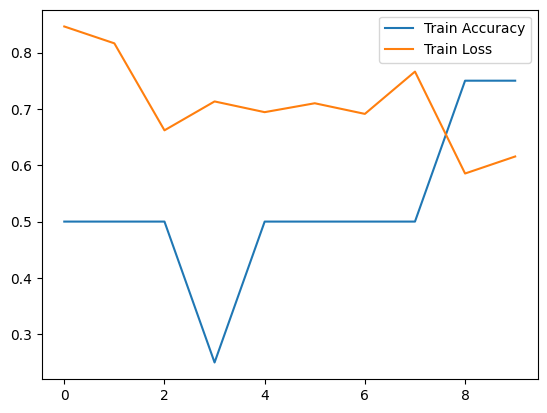

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

plt.plot(acc, label='Train Accuracy')
plt.plot(loss, label='Train Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def predict_image(img_path):
    img = load_img(img_path, target_size=(img_size,img_size))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    classes = list(train_generator.class_indices.keys())
    return classes[class_index], prediction

print(predict_image(dataset_path + "/DR/DR1.png"))
print(predict_image(dataset_path + "/NPDR/NPDR1.jpg"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
('DR', array([[0.5208517 , 0.47914836]], dtype=float32))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
('NPDR', array([[0.3971325, 0.6028675]], dtype=float32))
